# Titanic: Machine Learning from Disaster

# 案例介绍
    泰坦尼克号的沉没是历史上伤亡人数最多、影响最深远的沉船事件之一。1912年4月15日，泰坦尼克号与冰山相撞，2224名乘客和船员中有1502人丧生。这场轰动性的悲剧震惊了国际社会，但也因此产生了更好的船舶安全法规。这次海难造成人员伤亡的原因之一是没有足够的救生艇供乘客和船员使用。
    
    虽然在沉船中幸存下来有一些运气因素，但有些人比其他人更可能存活下来。在本次学习中，在给定的部分存活人员信息中，将应用python来分析哪些乘客可能在悲剧中存活。此次，棕榈学院将携手Yiyu导师给各位想学习Python、想要在数据行业继续发展学习的同学来讲授如何完成这样一个project，相信会对你们的数据分析技能的提升大有裨益。

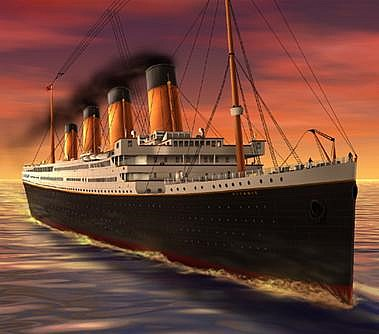

In [78]:
#查看图片
from IPython.display import Image
Image(filename='titanic.png') 


1. 定义并理解问题
2. 获取数据
3. 观察并理解数据
4. 数据清理&数据可视化
5. 数据需求&特征工程
6. 选取模型
7. 测试训练集&测试集
8. 衡量结果

## 理解问题

 - 预测泰坦尼克号上的乘客能否存活
 - 二元分类
 - 准确率

In [25]:
#有时候运行代码时会有很多warning输出，如提醒新版本之类的，如果不想这些乱糟糟的输出可以这样：但是切记，不要盲目设置取消输出。
import warnings
warnings.filterwarnings('ignore')

## 获取数据

In [4]:
#载入pandas数据包，以pd来简化命名；Pandas是Python一个非常重要的科学计算包，数据科学家、数据分析师都会非常普遍地用到这个包；
import pandas as pd

In [12]:
#读取准备好的CSV数据，导入训练集和测试集
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [13]:
#查看训练集和测试集的数据维度
train_df.shape,test_df.shape

((891, 12), (418, 11))

## 观察并理解数据

In [22]:
#载入matplotlib包，以plt简化命名；Matplotlib是Python中一个非常重要的绘图包，大量的数据可视化工作会用到这个包；
import matplotlib.pyplot as plt

In [16]:
#读取训练集表头-就是每一个表格的Column name，列名
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [17]:
#读取测试集表头-同上
print(test_df.columns.values)

['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']


In [14]:
#观望一下数据，这个函数可以供你看到除了表头的前五行数据
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


 - 分类变量-----PassengerID,Pclass,Name
 - 数字变量-----Age,Fare

In [18]:
#这个函数可以查看所有数据变量的类型信息，int=integer(整数)，object=对象，float=浮点数
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [69]:
#判断数据集里每一个数据变量的缺失值有多少个，我们可以看到Age这个变量的缺失值是最多的；
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
#对数据进行描述性统计分析，这个函数可以自动计算出每一个数字变量的平均数、标准差、分位数等等重要统计概念
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0, 0.5, 'Count')

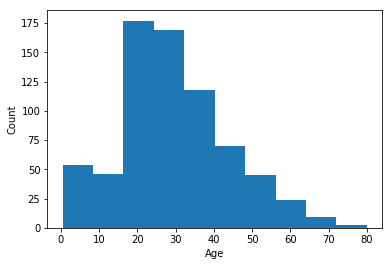

In [27]:
#绘制年龄分布直方图，横轴为年龄，纵轴为人数
plt.hist(train_df['Age'])
plt.xlabel('Age')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

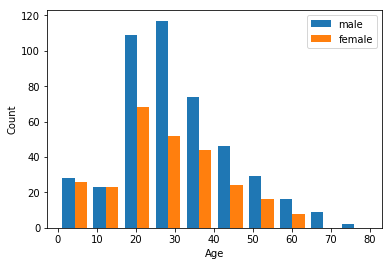

In [43]:
#这个是一个绘图函数，从matplotlib这个包里调取，绘制各年龄层性别分布直方图
plt.hist([train_df[train_df['Sex'] == 'male'].Age,train_df[train_df['Sex'] == 'female'].Age])
plt.legend(['male','female'])
plt.xlabel('Age')
plt.ylabel('Count')

In [44]:
#生成交叉表，分析存活与死亡人数中性别分布
pd.crosstab(train_df['Survived'],train_df['Sex'])

Sex,female,male
Survived,,
0,81,468
1,233,109


In [59]:
#生成交叉表，分析存活与死亡人数中客舱等级分布
pd.crosstab(train_df['Survived'],train_df['Pclass'])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [60]:
#根据登船城市、存活情况对数据进行分组，并统计个数
train_df.groupby(['Embarked','Survived']).size()

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
dtype: int64

In [51]:
#这个函数其实是SQL语言在Python里的一个应用，SQL语言主要负责数据管理，这句代码的意思是对python中的pandas进行sql查询
#为了方便使用，我们不用下载SQL语言，而是直接在Python里使用
from pandasql import sqldf

In [62]:
#从训练集中选择存活情况、乘客同船的父母/子女人数这几个变量进行分组计数（注意：其实这几句代码已经是SQL语言了哦）
#Select，from，Groupby这三个函数可是SQL语言里非常重要且应用普遍的函数了哦！
q1 = """
SELECT Survived,Parch,count(*) 
FROM train_df 
GROUP BY Survived,Parch
"""
sqldf(q1)

,Survived,Parch,count(*)
0,0,0,445
1,0,1,53
2,0,2,40
3,0,3,2
4,0,4,4
5,0,5,4
6,0,6,1
7,1,0,233
8,1,1,65
9,1,2,40
